## AI Retail Analysis

## It explores the impact and adoption of AI technologies in the retail industry, with a focus on customer demographics, preferences, payment methods, and AI-enabled tools.

### Source
This dataset, titled "AI in Retail Dataset", was obtained from [Kaggle's AI Retail Consumer Behavior dataset]. It contains synthetic/real-world data designed to analyze consumer behavior, payment methods, and AI adoption in the retail sector. The dataset was used solely for academic and research purposes.

### Dataset Information

#### Title:  
**AI in Retail Dataset**

#### Description:  
This dataset explores the intersection of Artificial Intelligence (AI) and the retail industry, focusing on consumer preferences, behaviors, and the adoption of AI technologies. It includes detailed information about demographics, payment preferences, and AI tools used, as well as satisfaction and privacy concerns related to AI in retail.

#### Size:  
- **Rows**: 656  
- **Columns**: 23  

#### Key Features:  
1. **Demographics**:  
   - `Country`: Country of the respondent.  
   - `Age`: Generational category (e.g., Gen Z, Gen X).  
   - `Gender`: Gender of the respondent.  
   - `Education`: Level of education achieved (e.g., Master’s Degree, Graduate).  
   - `Living_Region`: Region where the respondent resides (e.g., Metropolitan, Rural).  

2. **Consumer Behavior**:  
   - `Online_Consumer`: Indicates whether the individual shops online.  
   - `Online_Service_Preference`: Preference for using online retail services.  

3. **Payment Preferences**:  
   - `Payment_Method_Credit/Debit`, `Payment_Method_COD`, `Payment_Method_Ewallet`: Details the payment methods commonly used.  

4. **AI Adoption and Usage**:  
   - `AI_Endorsement`: Endorsement of AI technologies in retail.  
   - `AI_Privacy_No_Trust`: Privacy concerns related to AI.  
   - `AI_Enhance_Experience`: Whether AI enhances the shopping experience.  
   - `AI_Satisfaction`: Customer satisfaction with AI features.  
   - `AI_Tools_Used_Chatbots`, `AI_Tools_Used_Virtual_Assistant`, `AI_Tools_Used_Voice&Photo_Search`: Usage of specific AI tools in retail.

5. **Product Categories**:  
   - Tracks preferences across product categories, including:  
     - `Product_Category_Appliances`  
     - `Product_Category_Electronics`  
     - `Product_Category_Groceries`  
     - `Product_Category_Personal_Care`  
     - `Product_Category_Clothing`  

In [1]:
import mysql.connector

In [41]:
import pandas as pd
import numpy as np
import requests
import mysql.connector
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\ADMIN\Downloads\AI in Retail Dataset.csv", encoding="latin1")
print(data.head())

  Country Online_Consumer    Age Annual_Salary  Gender            Education  \
0   INDIA             YES  Gen X   Medium High  Female      Masters Degree   
1   INDIA             YES  Gen Z           Low    Male  University Graduate   
2   INDIA             YES  Gen X   Medium High    Male  University Graduate   
3   INDIA             YES  Gen X          High    Male  University Graduate   
4   INDIA             YES  Gen Z           Low    Male  University Graduate   

  Payment_Method_Credit/Debit Living_Region Online_Service_Preference  \
0                          NO  Metropolitan                        NO   
1                         YES  Metropolitan                        NO   
2                         YES   Rural Areas                       YES   
3                         YES   Rural Areas                       YES   
4                          NO   Rural Areas                       YES   

  AI_Endorsement AI_Privacy_No_Trust  AI_Enhance_Experience AI_Satisfication  \
0     

In [8]:
data.shape

(656, 23)

In [23]:
data.describe()

,Country,Online_Consumer,Age,Annual_Salary,Gender,Education,Payment_Method_Credit/Debit,Living_Region,Online_Service_Preference,AI_Endorsement,...,AI_Tools_Used _Chatbots,AI_Tools_Used_Virtual_Assistant,AI_Tools_Used_Voice&Photo_Search,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing
count,656,656,656,656,656,656,656,656,656,656,...,656,656,656,656,656,656,656,656,656,656
unique,3,2,4,4,3,4,2,3,2,2,...,2,2,2,2,2,2,2,2,2,2
top,CHINA,YES,Millennials,High,Female,University Graduate,YES,Metropolitan,YES,YES,...,NO,NO,NO,NO,NO,YES,YES,NO,YES,YES
freq,252,635,366,230,361,347,425,438,485,554,...,359,359,406,462,407,329,432,374,342,480


In [10]:
data.isnull().sum()

Country                             0
Online_Consumer                     0
Age                                 0
Annual_Salary                       0
Gender                              0
Education                           0
Payment_Method_Credit/Debit         0
Living_Region                       0
Online_Service_Preference           0
AI_Endorsement                      0
AI_Privacy_No_Trust                 0
AI_Enhance_Experience               0
AI_Satisfication                    0
AI_Tools_Used _Chatbots             0
AI_Tools_Used_Virtual_Assistant     0
AI_Tools_Used_Voice&Photo_Search    0
Payment_Method_COD                  0
Payment_Method_Ewallet              0
Product_Category_Appliances         0
Product_Category_Electronics        0
Product_Category_Groceries          0
Product_Category_Personal_Care      0
Product_Category_Clothing           0
dtype: int64

In [3]:
conn=mysql.connector.connect(
    host='localhost',
    user='root',
    password='2040',
    database='data'
)

In [4]:
cursor=conn.cursor()

In [5]:
#Table is created

In [11]:


table_query="""CREATE TABLE AI_Retail_Data (
    Country VARCHAR(50),
    Online_Consumer VARCHAR(3),
    Age VARCHAR(10),
    Annual_Salary VARCHAR(50),
    Gender VARCHAR(10),
    Education VARCHAR(100),
    Payment_Method_Credit_Debit VARCHAR(3),
    Living_Region VARCHAR(50),
    Online_Service_Preference VARCHAR(3),
    AI_Endorsement VARCHAR(3),
    AI_Privacy_No_Trust VARCHAR(3),
    AI_Enhance_Experience VARCHAR(3),
    AI_Satisfaction VARCHAR(3),
    AI_Tools_Used_Chatbots VARCHAR(3),
    AI_Tools_Used_Virtual_Assistant VARCHAR(3),
    AI_Tools_Used_Voice_Photo_Search VARCHAR(3),
    Payment_Method_COD VARCHAR(3),
    Payment_Method_Ewallet VARCHAR(3),
    Product_Category_Appliances VARCHAR(3),
    Product_Category_Electronics VARCHAR(3),
    Product_Category_Groceries VARCHAR(3),
    Product_Category_Personal_Care VARCHAR(3),
    Product_Category_Clothing VARCHAR(3))"""
table_create=cursor.execute(table_query)

In [ ]:
insert_query=""" INSERT INTO data.AI_Retail_Data (
    Country,
    Online_Consumer,
    Age,
    Annual_Salary,
    Gender,
    Education,
    Payment_Method_Credit_Debit,
    Living_Region,
    Online_Service_Preference,
    AI_Endorsement,
    AI_Privacy_No_Trust,
    AI_Enhance_Experience,
    AI_Satisfaction,
    AI_Tools_Used_Chatbots,
    AI_Tools_Used_Virtual_Assistant,
    AI_Tools_Used_Voice_Photo_Search,
    Payment_Method_COD,
    Payment_Method_Ewallet,
    Product_Category_Appliances,
    Product_Category_Electronics,
    Product_Category_Groceries,
    Product_Category_Personal_Care,
    Product_Category_Clothing
)
VALUES
    (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
"""

In [ ]:
for _,row in data.iterrows():
    insert_data=cursor.execute(insert_query,(
    row['Country'],
    row['Online_Consumer'],
    row['Age'],
    row['Annual_Salary'],
    row['Gender'],
    row['Education'],
    row['Payment_Method_Credit/Debit'],
    row['Living_Region'],
    row['Online_Service_Preference'],
    row['AI_Endorsement'],
    row['AI_Privacy_No_Trust '],
    row['AI_Enhance_Experience'],
    row['AI_Satisfication'],
    row['AI_Tools_Used _Chatbots'],
    row['AI_Tools_Used_Virtual_Assistant'],
    row['AI_Tools_Used_Voice&Photo_Search'],
    row['Payment_Method_COD'],
    row['Payment_Method_Ewallet'],
    row['Product_Category_Appliances'],
    row['Product_Category_Electronics'],
    row['Product_Category_Groceries'],
    row['Product_Category_Personal_Care'],
    row['Product_Category_Clothing']
    ))

In [30]:
cursor.description
#contains the description about the table columns

[('Country', 253, None, None, None, None, 1, 0, 255),
 ('Online_Consumer', 253, None, None, None, None, 1, 0, 255),
 ('Age', 253, None, None, None, None, 1, 0, 255),
 ('Annual_Salary', 253, None, None, None, None, 1, 0, 255),
 ('Gender', 253, None, None, None, None, 1, 0, 255),
 ('Education', 253, None, None, None, None, 1, 0, 255),
 ('Payment_Method_Credit_Debit', 253, None, None, None, None, 1, 0, 255),
 ('Living_Region', 253, None, None, None, None, 1, 0, 255),
 ('Online_Service_Preference', 253, None, None, None, None, 1, 0, 255),
 ('AI_Endorsement', 253, None, None, None, None, 1, 0, 255),
 ('AI_Privacy_No_Trust', 253, None, None, None, None, 1, 0, 255),
 ('AI_Enhance_Experience', 253, None, None, None, None, 1, 0, 255),
 ('AI_Satisfaction', 253, None, None, None, None, 1, 0, 255),
 ('AI_Tools_Used_Chatbots', 253, None, None, None, None, 1, 0, 255),
 ('AI_Tools_Used_Virtual_Assistant', 253, None, None, None, None, 1, 0, 255),
 ('AI_Tools_Used_Voice_Photo_Search', 253, None, None, 

In [38]:
#Etract the table from MYSQL server 
table="SELECT * FROM data.ai_retail_data;";
cursor.execute(table)
result=cursor.fetchall()
col_names=[desc[0] for desc in cursor.description]
df=pd.DataFrame(result,columns=col_names)
pd.set_option('display.max_columns',23)
df.head()

,Country,Online_Consumer,Age,Annual_Salary,Gender,Education,Payment_Method_Credit_Debit,Living_Region,Online_Service_Preference,AI_Endorsement,AI_Privacy_No_Trust,AI_Enhance_Experience,AI_Satisfaction,AI_Tools_Used_Chatbots,AI_Tools_Used_Virtual_Assistant,AI_Tools_Used_Voice_Photo_Search,Payment_Method_COD,Payment_Method_Ewallet,Product_Category_Appliances,Product_Category_Electronics,Product_Category_Groceries,Product_Category_Personal_Care,Product_Category_Clothing
0,INDIA,YES,Gen X,Medium High,Female,Masters Degree,NO,Metropolitan,NO,YES,YES,YES,Satisfied,YES,YES,YES,YES,NO,YES,YES,YES,YES,YES
1,INDIA,YES,Gen Z,Low,Male,University Graduate,YES,Metropolitan,NO,YES,YES,YES,Satisfied,YES,YES,YES,YES,YES,YES,YES,NO,NO,NO
2,INDIA,YES,Gen X,Medium High,Male,University Graduate,YES,Rural Areas,YES,YES,YES,YES,Satisfied,NO,YES,NO,YES,YES,YES,YES,YES,NO,NO
3,INDIA,YES,Gen X,High,Male,University Graduate,YES,Rural Areas,YES,YES,YES,YES,Satisfied,NO,NO,NO,YES,YES,YES,YES,YES,NO,YES
4,INDIA,YES,Gen Z,Low,Male,University Graduate,NO,Rural Areas,YES,YES,YES,YES,Satisfied,YES,NO,NO,YES,YES,YES,NO,YES,NO,YES


#### What type Age group will use mostly use AI Adoption in day-to-day life
**Millennials (Gen Y):** Born between 1981 and 1996, this tech-savvy generation is known for growing up during the rise of the internet and social media, valuing convenience and digital experiences.

**Gen X**: Born between 1965 and 1980, this generation is characterized by independence, adaptability, and a balanced mix of traditional and digital habits.

**Gen Z**: Born between 1997 and 2012, this digital-native generation is highly connected, prioritizes personalization, and is quick to adopt emerging technologies.

**Baby Boomers**: Born between 1946 and 1964, this post-WWII generation is known for their strong work ethic and loyalty, often adapting to technology later in life.

In [59]:
age=df["Age"].value_counts()
age

Age
Millennials     366
Gen X           139
Gen Z           127
Baby Boomers     24
Name: count, dtype: int64

Text(0, 0.5, 'People')

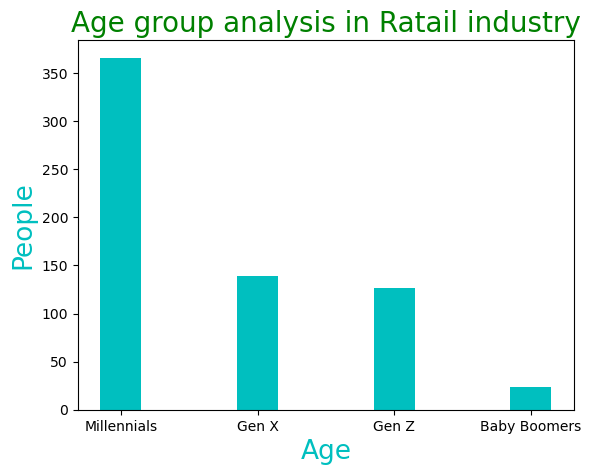

In [82]:
plt.bar(age.index,age.values,color='c',width=0.3)
plt.title("Age group analysis in Ratail industry",fontsize=20,color='green')
plt.xlabel("Age",fontsize=19,color='c')
plt.ylabel("People",fontsize=19,color='c')

In [145]:
country=df['Country'].value_counts()
country

Country
CHINA     252
CANADA    231
INDIA     173
Name: count, dtype: int64

In [144]:
region=df['Living_Region'].value_counts()
country

Living_Region
Metropolitan      438
Suburban Areas    145
Rural Areas        73
Name: count, dtype: int64

In [140]:
df.loc[:,['Country','Living_Region']]

,Country,Living_Region
0,INDIA,Metropolitan
1,INDIA,Metropolitan
2,INDIA,Rural Areas
3,INDIA,Rural Areas
4,INDIA,Rural Areas
...,...,...
651,CANADA,Suburban Areas
652,CANADA,Metropolitan
653,CANADA,Metropolitan
654,CANADA,Suburban Areas


In [113]:
india=df[df['Country']=="INDIA"]['Living_Region'].value_counts()
china=df[df['Country']=="CHINA"]['Living_Region'].value_counts()
canada=df[df['Country']=="CANADA"]['Living_Region'].value_counts()
print(india)
print(china)
print(canada)

Living_Region
Metropolitan    145
Rural Areas      28
Name: count, dtype: int64
Living_Region
Metropolitan      191
Suburban Areas     48
Rural Areas        13
Name: count, dtype: int64
Living_Region
Metropolitan      102
Suburban Areas     97
Rural Areas        32
Name: count, dtype: int64


In [163]:
gender=df['Gender'].value_counts()
gender

Gender
Female               361
Male                 294
Prefer not to say      1
Name: count, dtype: int64

Text(0, 0.5, 'People')

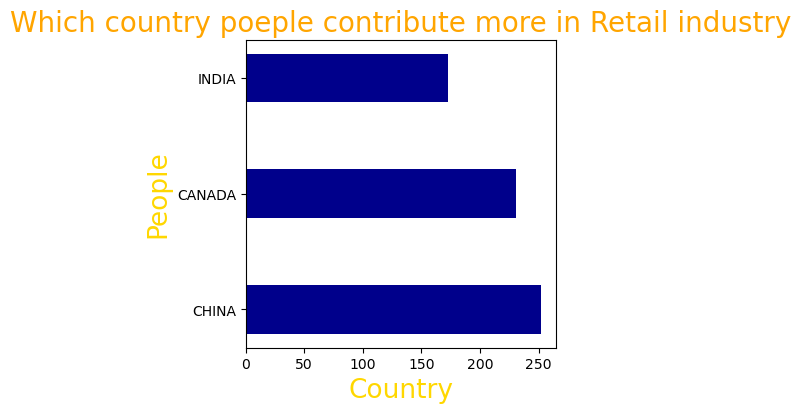

In [149]:
plt.figure(figsize=(4,4))
plt.barh(country.index,country.values,color='darkblue',height=0.42)
plt.title("Which country poeple contribute more in Retail industry",fontsize=20,color='orange')
plt.xlabel("Country",fontsize=19,color='gold')
plt.ylabel("People",fontsize=19,color='gold')

Text(0.5, 1.0, 'CANADA')

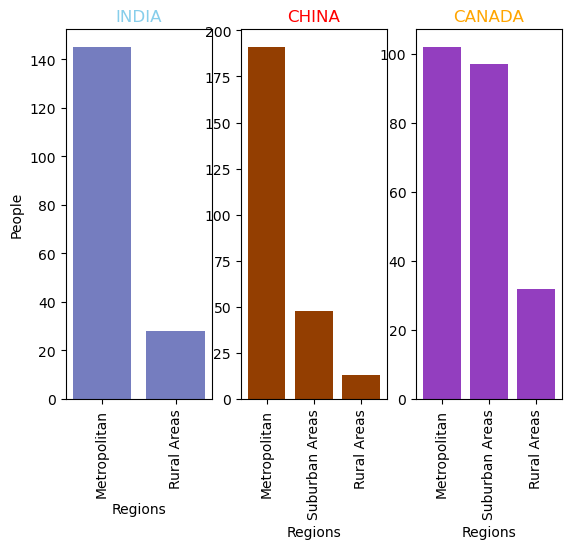

In [165]:
plt.subplot(1,3,1)
plt.bar(india.index,india.values,color='#757dbf')
plt.xlabel('Regions')
plt.ylabel("People")
plt.xticks(rotation=90)
plt.title('INDIA',color='skyblue')


plt.subplot(1,3,2)
plt.bar(china.index,china.values,color='#933e01')
plt.xlabel('Regions')
#plt.ylabel("People")
plt.xticks(rotation=90)
plt.title('CHINA',color='red')


plt.subplot(1,3,3)
plt.bar(canada.index,canada.values,color='#933ebf')
plt.xlabel('Regions')
#plt.ylabel("People")
plt.xticks(rotation=90)
plt.title('CANADA',color='orange')



Text(0.5, 1.0, 'Gender')

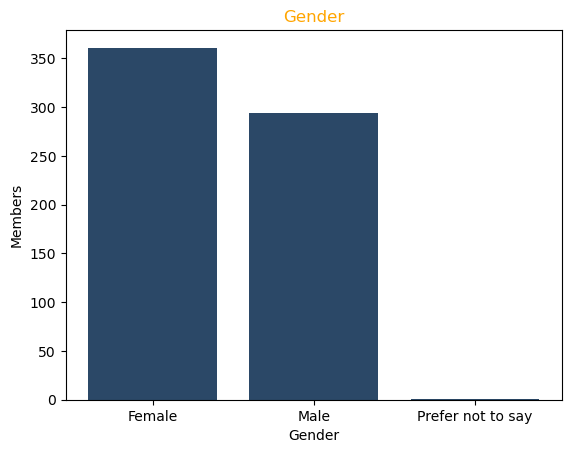

In [167]:
#plt.subplot(1,3,3)
plt.bar(gender.index,gender.values,color='#2b4867')
plt.xlabel('Gender')
plt.ylabel("Members")
plt.xticks(rotation=0)
plt.title('Gender',color='orange')

In [208]:
Appliances=df.loc[:,'Product_Category_Appliances'].value_counts()
Appliances

Product_Category_Appliances
YES    329
NO     327
Name: count, dtype: int64

In [209]:
Electronics=df.loc[:,'Product_Category_Electronics'].value_counts()
Electronics

Product_Category_Electronics
YES    432
NO     224
Name: count, dtype: int64

In [210]:
Groceries=df.loc[:,'Product_Category_Groceries'].value_counts()
Groceries

Product_Category_Groceries
NO     374
YES    282
Name: count, dtype: int64

In [211]:
Personal_Care=df.loc[:,'Product_Category_Personal_Care'].value_counts()
Personal_Care

Product_Category_Personal_Care
YES    342
NO     314
Name: count, dtype: int64

In [212]:
Clothing=df.loc[:,'Product_Category_Clothing'].value_counts()
Clothing

Product_Category_Clothing
YES    480
NO     176
Name: count, dtype: int64

In [213]:
import seaborn as sns

Text(0.5, 1.0, 'Clothing')

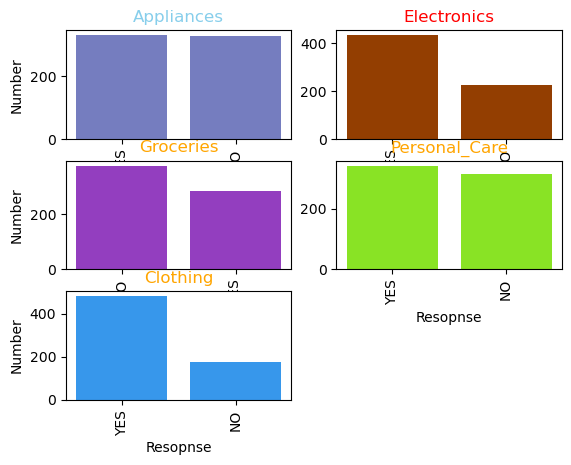

In [220]:
plt.subplot(3,2,1)
plt.bar(Appliances.index,Appliances.values,color='#757dbf')
plt.xlabel('Resopnse')
plt.ylabel("Number")
plt.xticks(rotation=90)
plt.title('Appliances',color='skyblue')
#plt.tight_layout()

plt.subplot(3,2,2)
plt.bar(Electronics.index,Electronics.values,color='#933e01')
plt.xlabel('Resopnse')
#plt.ylabel("People")
plt.xticks(rotation=90)
plt.title('Electronics',color='red')


plt.subplot(3,2,3)
plt.bar(Groceries.index,Groceries.values,color='#933ebf')
plt.xlabel('Resopnse')
plt.ylabel("Number")
plt.xticks(rotation=90)
plt.title('Groceries',color='orange')

plt.subplot(3,2,4)
plt.bar(Personal_Care.index,Personal_Care.values,color='#89e325')
plt.xlabel('Resopnse')
#plt.ylabel("People")
plt.xticks(rotation=90)
plt.title('Personal_Care',color='orange')

plt.subplot(3,2,5)
plt.bar(Clothing.index,Clothing.values,color='#3797eb')
plt.xlabel('Resopnse')
plt.ylabel("Number")
plt.xticks(rotation=90)
plt.title('Clothing',color='orange')

In [ ]:
conn.commit()
cursor.close()
conn.close()
print("Data is successfully loaded into your server")